# Numerical Differentiation 


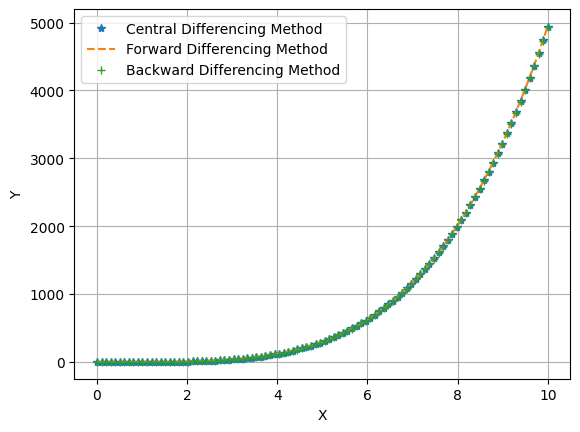

In [9]:
def function_of_x_cp(x, h):
    yh1 = 0.1*(x+h)**5-0.2*(x+h)**3+0.1*(x+h)-0.2
    yh_1 = 0.1*(x-h)**5-0.2*(x-h)**3+0.1*(x-h)-0.2

    yh_p = (yh1-yh_1)/(2*h)
    
    return (yh_p)

def function_of_fp(x,h):
    y = 0.1*x**5-0.2*x**3+0.1*x-0.2
    yh1 = 0.1*(x+h)**5-0.2*(x+h)**3+0.1*(x+h)-0.2

    yh_P1 = (yh1-y)/h

    return (yh_P1)
def function_of_x_bp(x,h):
    y = 0.1*x**5-0.2*x**3+0.1*x-0.2
    yh_1 = 0.1*(x-h)**5-0.2*(x-h)**3+0.1*(x-h)-0.2

    yh_p2 = (y-yh_1)/(h)

    return (yh_p2)


import numpy as np
import matplotlib.pyplot as plt 

x_p= np.linspace(0,10,100)
h = 0.01

ycp_values = [function_of_x_cp(x,h) for x in x_p]
yfp_values = [function_of_fp(x,h) for x in x_p]
ybp_values = [function_of_x_bp(x,h) for x in x_p]

plt.plot(x_p, ycp_values, '*')
plt.plot(x_p, yfp_values, '--')
plt.plot(x_p, ybp_values,'+')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Central Differencing Method', 'Forward Differencing Method', 'Backward Differencing Method'])
plt.grid('True')
plt.show()




In [15]:
import numpy as np

polynom = np.poly1d([0.1, 0, -0.2, 0, 0.1, -0.2])
poly_val = np.polyval(polynom, 2)

polyd = np.polyder(polynom)
polydv = np.polyval(polyd, 5)
print(polyd)
print(polydv)

def function_of_x_cp(x, h):
    yh1 = 0.1*(x+h)**5-0.2*(x+h)**3+0.1*(x+h)-0.2
    yh_1 = 0.1*(x-h)**5-0.2*(x-h)**3+0.1*(x-h)-0.2

    yh_p = (yh1-yh_1)/(2*h)
    
    print(yh_p)
function_of_x_cp(5, 0.1)


     4       2
0.5 x - 0.6 x + 0.1
297.6
297.848009999999


# Numerical Integration 

## Trapezoidal Rule 

In [19]:
import numpy as np
import math 

f = lambda x: x*np.sin(x)

a = 0
b = np.pi/2
n = 100
h = (b-a)/n 

S = 0.5*(f(b)+f(a))
for i in range (1,n):
    S+= f(a+i*h)
integration = S*h

print("Integration: ", integration)

Integration:  1.0000205619295077


## Simpson's 1/3 Rule

In [22]:
import numpy as np

f = lambda x: x*np.sin(x)

a = 0
b = np.pi/2
n = 100
h = (b-a)/n 
S = (f(a)+f(b))
for i in range (1,n,2):
    S+=4*f(a+i*h)
for i in range (2,n,2):
    S+=2*f(a+i*h)
integration = S*(1/3)*h
print('integration: ',integration)


integration:  0.9999999989852721


# Simpson's 3/8 Rule

In [24]:
import numpy as np 
f = lambda x: x*np.sin(x)

a = 0
b = np.pi/2
n = 100
h = (b-a)/n
S=(f(a)+f(b))

for i in range (1,n,3):
    S+=3*(f(a+i*h)+f(a+(i+1)*h))
for i in range (3,n,3):
    S+=2*f(a+i*h)

integration = (3/8)*S*h
print('Integration: ',integration)

Integration:  0.9938622144426268


In [31]:
def f(x,y): return x**2*y+x*y**2

ax = 1
bx = 2
ay = -1
by = 1
nx = 100
ny = 100
hx = (bx-ax)/nx
hy = (by-ay)/ny

S = 0
for i in range (0,ny+1):
    if i==0 or i==ny:
        p = 1
    elif i%2 == 1:
        p = 4
    else: 
        p=2
    for j in range (0,nx+1):
        if j==0 or i==nx:
            q=1
        elif j%2==1:
            q=4
        else: 
            q=2
        S+=p*q*f(ax+j*hx,ay+i*hy)
double_integration=S*(1/9)*hx*hy
print('Double Integration result: ', double_integration)

Double Integration result:  0.987363000000002


In [43]:
def f(x,y): return x**2*y+y**2*x

ax =1
bx=2
ay=-1
by=1
nx= 100
ny = 100
hx=(bx-ax)/nx
hy=(by-ay)/ny
S=0

for i in range (0,ny+1):
    if i==0 or i==ny:
        p=1
    elif i%3==2:
        p=3
    else:
        p=2
    for j in range (0,nx+1):
        if j==0 or j==nx:
            q=1
        elif j%3==2:
            q=3
        else:
            q=2
        S+=p*q*(f(ax+j*hx,ay+i*hy)+f(ax+(j+1)*hx,ay+(i+1)*hy))

double_integration = (9/64)*hx*hy*S
print('Double Integration: ',double_integration)


Double Integration:  1.6008063265687502


In [3]:
def Simpson_one_third(fn, up_lim, low_lim, N):
    h = (up_lim-low_lim)/N
    S = (fn(up_lim)+fn(low_lim))
    for i in range (1,N,2):
        S+=4*fn(low_lim+i*h)
    for i in range (2,N,2):
        S+=2*fn(low_lim+i*h)
    integral_1 = S*(1/3)*h

    print ("Integration result using Simpson's one third rule: ", integral_1)

def Trapezoidal(fn, up_lim, low_lim, N):
    h = (up_lim-low_lim)/N
    S= 0.5*(fn(up_lim)+fn(low_lim))
    for i in range (1,N):
        S+=fn(low_lim+i*h)
    integral_2 = S*h

    print("Integration result using Trapezoidal rule: ", integral_2)

def Simpsons_three_eight (fn, up_lim, low_lim, N):
    h = (up_lim-low_lim)/N
    S = (fn(up_lim)+fn(low_lim))
    for i in range (1,N,3):
        S+=3*(fn(low_lim+i*h)+fn(low_lim+(i+1)*h))
    for i in range (3,N,3):
        S+= 2*fn(low_lim+i*h)
    integral_3 = (3/8)*S*h
    
    print("Integration result using Simpsons three by eight rule: ", integral_3)

import numpy as np

def fn(x): return x*np.sin(x)

Simpson_one_third(fn, np.pi/2, 0, 100)
Simpsons_three_eight(fn, np.pi/2, 0, 100)
Trapezoidal(fn, np.pi/2, 0, 100)

Integration result using Simpson's one third rule:  0.9999999989852721
Integration result using Simpsons three by eight rule:  0.9938622144426268
Integration result using Trapezoidal rule:  1.0000205619295077
